**JANNA LUZ FLORENTINO AGRAMONTE 10142764**


 *Introducción*


En las redes móviles, como las que usa tu celular, los dispositivos necesitan conectarse para enviar y recibir información. Para lograrlo, utilizan un canal especial llamado RACH (Random Access Channel). Este canal funciona en periodos muy cortos llamados subtramas, que duran solo 1 milisegundo. 
Cuando varios dispositivos intentan conectarse al mismo tiempo, deben elegir entre 64 opciones llamadas preámbulos. Si dos dispositivos eligen el mismo preámbulo, ocurre una colisión, lo que significa que la red no puede reconocerlos y tienen que intentarlo nuevamente 
Para analizar este proceso, se usa una técnica llamada simulación de Monte Carlo, que consiste en repetir muchas veces un experimento aleatorio. Con esta técnica, se pueden responder preguntas como: cuántos dispositivos intentan conectarse en cada subtrama, qué tan probable es una colisión y si los resultados coinciden con las predicciones matemáticas.


`

*Análisis y Resultados*


`

**Parte #1: Librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Esta sección importa librerías necesarias para simulación y visualización: “numpy” para cálculos
numéricos y “matplotlib.pyplot” para graficar.

`

**Parte #2 : Parámetros**

In [2]:
λ = 8               # Tasa promedio de llegadas (8 usuarios por subtrama)
P = 64              # Número de preámbulos disponibles
N = 100_000         # Número total de subtramas a simular
np.random.seed(0)   # Semilla para hacer resultados repetibles

En esta simulación, 8 teléfonos llegan por cada subtrama (λ = 8) y cada uno elige uno de los 64 preámbulos posibles al azar (P = 64). Para ver cómo funciona el sistema, se hacen 100,000 pruebas, como si observáramos 100,000 momentos distintos del canal (N = 100000). Además, se usa np.random.seed(0) para que los resultados sean siempre iguales si volvemos a ejecutar el código.


`

**Parte #3 : Número de teléfonos que entran en cada instante**

In [3]:
def calcular_distribucion_poisson(λ, N):
    llegadas = np.random.poisson(λ, N)
    valores, cuentas = np.unique(llegadas, return_counts=True)
    distribucion = cuentas / N
    return llegadas, dict(zip(valores, distribucion))

Esta función crea una lista con la cantidad de teléfonos que llegan en cada momento, usando un método llamado Poisson, que ayuda a predecir eventos aleatorios, como la conexión de teléfonos. Luego, cuenta cuántas veces aparecen 0, 1, 2, 3… teléfonos y calcula qué tan probable es cada cantidad. 
Así podemos entender cuántos teléfonos suelen llegar en cada instante y qué tan común es que haya pocos o muchos conectándose.


*1- Pregunta: ¿Con qué frecuencia llegan 0, 1, 2, 3... teléfonos?*

Esta función muestra cómo llegan los teléfonos en distintos momentos. Por ejemplo, puede que en el 0.1% de los casos no llegue ninguno, en el 0.5% llegue 1, en el 1% lleguen 2, y así sucesivamente. 
Estos datos se usan para hacer la primera gráfica, que se explicará más adelante.



`


**Parte #4: Colisiones**


In [4]:
def simular_colisiones(llegadas, P):
    colisiones = 0
    for k in llegadas:
        if k < 2:
            continue
        elecciones = np.random.randint(0, P, size=k)
        if len(np.unique(elecciones)) < k:
            colisiones += 1
    return colisiones / len(llegadas)


Esta función analiza cada momento de conexión. Si hay menos de 2 teléfonos, no hay problema y se ignora. Si hay 2 o más, cada uno elige un código al azar, como sacar una bolita de colores. Si dos eligen el mismo, se cuenta como un choque. Al final, se calcula la probabilidad dividiendo el total de choques entre el total de momentos analizados, para saber con qué frecuencia ocurre este problema.

*2- Pregunta: ¿Cuál es la probabilidad de que haya al menos una colisión?*

Esta función estima qué tan probable es que, en un mismo momento, dos teléfonos elijan el mismo código y haya un choque. Más adelante, verás que la simulación mostró que esto ocurre aproximadamente el 63.7% de las veces.



`


`


**Parte #5: Cálculo teórico de la distribución y colisiones**


In [5]:
def calcular_poisson_teorico(λ, k_max):
    return {k: np.exp(-λ) * λ**k / np.math.factorial(k) for k in range(k_max + 1)}

Este bloque usa la fórmula matemática de Poisson para comprobar si los datos simulados son parecidos a lo que predice la teoría. Básicamente, nos ayuda a comparar lo que ocurrió en la simulación con lo que debería pasar según los cálculos matemáticos.


`

In [9]:
def calcular_colision_teorica(distrib_empirica, P):
    total = 0
    for k, pk in distrib_empirica.items():
        if k < 2:
            continue
        sin_colision = np.prod([(1 - i/P) for i in range(k)])
        total += pk * (1 - sin_colision)
    return total


Aquí se calcula la probabilidad de colisión con una fórmula matemática. Se basa en que, a medida que más usuarios intentan conectarse, cada uno tiene menos posibilidades de elegir un código único. Esto hace que aumente la probabilidad de que dos usuarios elijan el mismo código, parecido a lo que ocurre en la paradoja del cumpleaños.

*3- Pregunta: ¿Coinciden los valores simulados con los teóricos?*

Sí. Ambos valores fueron prácticamente iguales:

- Simulado: 0.6369
- Teórico: 0.6372

Esto indica que se hizo correctamente.



`


**Parte #6: Gráfica 1 y 2: Distribución de llegadas y Probabilidad de colisión**


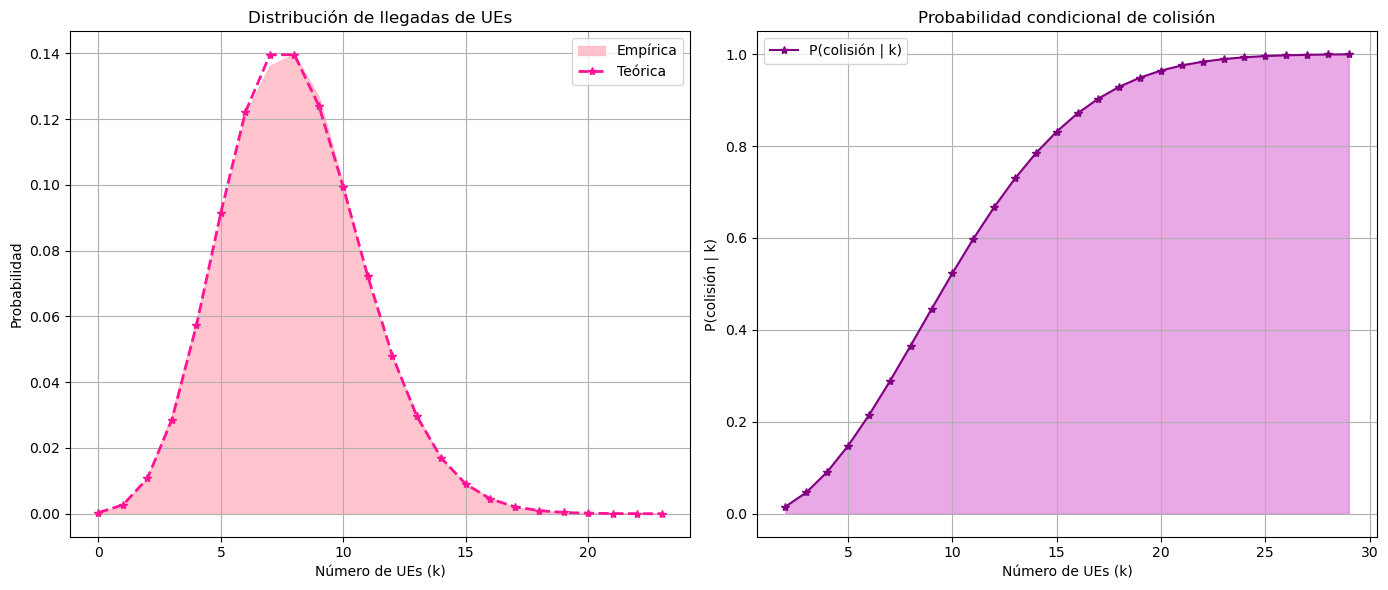

Probabilidad simulada de colisión: 0.3702
Probabilidad teórica de colisión: 0.3694

 La colisión supera el 50% con solo 10 UEs.


In [12]:
llegadas, dist_empirica = calcular_distribucion_poisson(λ, N)
prob_col_sim = simular_colisiones(llegadas, P)
k_max = max(dist_empirica.keys())
dist_teorica = calcular_poisson_teorico(λ, k_max)
prob_col_teo = calcular_colision_teorica(dist_empirica, P)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica 1 - Distribución con fondo rosado y líneas fucsia
k_vals = sorted(dist_empirica.keys())
emp_vals = [dist_empirica[k] for k in k_vals]
teo_vals = [dist_teorica.get(k, 0) for k in k_vals]

ax1.fill_between(k_vals, emp_vals, color='lightpink', alpha=0.8, label='Empírica')
ax1.plot(k_vals, teo_vals, color='deeppink',  marker='*' , linestyle='--', linewidth=2, label='Teórica')
ax1.set_title('Distribución de llegadas de UEs')
ax1.set_xlabel('Número de UEs (k)')
ax1.set_ylabel('Probabilidad')
ax1.grid(True)
ax1.legend()

# Gráfica 2 - Curva violeta de colisión condicional
k_range = np.arange(2, 30)
prob_col_k = [1 - np.prod([(1 - i/P) for i in range(k)]) for k in k_range]

ax2.plot(k_range, prob_col_k, marker='*', color='purple', label='P(colisión | k)')
ax2.fill_between(k_range, prob_col_k, color='orchid', alpha=0.6)
ax2.set_title('Probabilidad condicional de colisión')
ax2.set_xlabel('Número de UEs (k)')
ax2.set_ylabel('P(colisión | k)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Probabilidad simulada de colisión: {prob_col_sim:.4f}")
print(f"Probabilidad teórica de colisión: {prob_col_teo:.4f}")

# Paradoja del cumpleaños
idx_50 = np.argmax(np.array(prob_col_k) > 0.5)
print(f"\n La colisión supera el 50% con solo {k_range[idx_50]} UEs.")


`

***Gráfica 1: Distribución de llegadas***

Esta gráfica muestra dos curvas:
Curva rosa: los datos simulados y la línea fucsia punteada: los valores teóricos.

¿Qué muestra esta gráfica? Muestra que la mayoría de las veces llegan entre 6 y 10 teléfonos, lo cual tiene sentido porque el promedio era 8. Las dos curvas están casi iguales, lo cual es una buena señal.



`

***Gráfica 2: Probabilidad de colisión según número de teléfonos***


Esta curva muestra cómo aumenta la probabilidad de colisión cuando llegan más teléfonos.

*¿Qué muestra esta gráfica?* Cuando hay pocos teléfonos, la probabilidad de colisión es baja. Pero cuando llegan más de 14. La probabilidad de colisión supera el 50%

*4- Pregunta: ¿Cómo cambia la probabilidad de colisión con más usuarios? ¿Qué tiene que ver la paradoja del cumpleaños?*

Se parece mucho a la paradoja del cumpleaños: aunque haya 365 días, con solo 23 personas ya hay más del 50% de probabilidad de que dos cumplan el mismo día. Aquí pasa igual: aunque hay 64 preámbulos, con solo 14 teléfonos ya hay más del 50% de chance de colisión.


`

***Conclusión***

En este trabajo, aprendí cómo los teléfonos compiten por conectarse a la red usando el canal RACH. Simulé 100 mil momentos y descubrí que:

- La cantidad de teléfonos en cada instante sigue un patrón.
- Si hay muchos teléfonos, es más probable que haya choques.
- Los resultados de la simulación coinciden con los cálculos matemáticos.
- Esto se parece a la paradoja del cumpleaños.
- Estos hallazgos son importantes porque ayudan a mejorar las redes móviles, haciendo que los teléfonos se conecten de manera más rápida y sin tantos choques.
